In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [6]:
w1_initial=np.random.normal(size=(28*28*1,10)).astype(np.float32)

In [7]:
with tf.device('/gpu:0'):
    def next_batch(batch_size , image , label):

        a=np.random.randint(np.shape(image)[0] -batch_size)
        batch_x = image[a:a+batch_size,:]
        batch_y= label[a:a+batch_size,:]
        return batch_x, batch_y

In [8]:
train_img=np.load('/home/user01/notebook/Mnist_Data/train_img.npy')
train_lab=np.load('/home/user01/notebook/Mnist_Data/train_lab.npy')
test_img=np.load('/home/user01/notebook/Mnist_Data/test_img.npy')
test_lab=np.load('/home/user01/notebook/Mnist_Data/test_lab.npy')
val_img=np.load('/home/user01/notebook/Mnist_Data/val_img.npy')
val_lab=np.load('/home/user01/notebook/Mnist_Data/val_lab.npy')

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


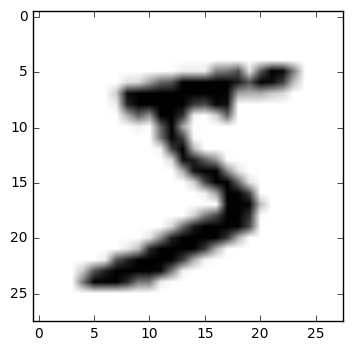

In [9]:
img=np.reshape(val_img[0] ,newshape=[28,28])
lab=val_lab[0]
print lab
plt.imshow(img, cmap='binary' )

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


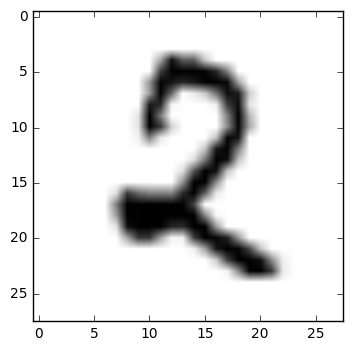

In [11]:
img=np.reshape(val_img[4999] ,newshape=[28,28])
lab=val_lab[0]
print lab
plt.imshow(img, cmap='binary' )

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


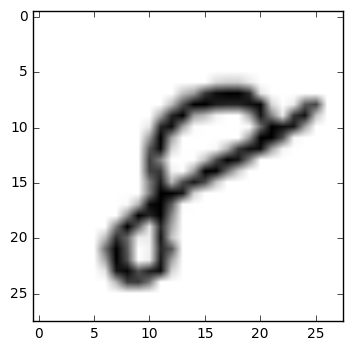

In [12]:
img=np.reshape(train_img[54999] ,newshape=[28,28])
lab=val_lab[0]
print lab
plt.imshow(img, cmap='binary' )

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


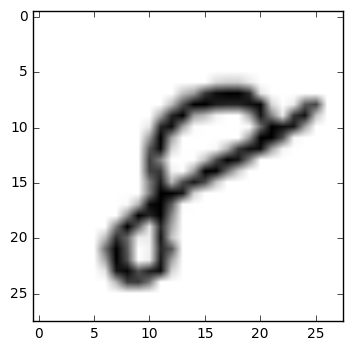

In [13]:
img=np.reshape(train_img[54999] ,newshape=[28,28])
lab=val_lab[0]
print lab
plt.imshow(img, cmap='binary' )

In [10]:
#x_pre=tf.placeholder(tf.float32 , shape=[None,28,28,1])
#x_ = tf.reshape(x_pre , shape=[-1,28*28*1])
x_=tf.placeholder(tf.float32 , shape=[None,28*28*1])
y_=tf.placeholder(tf.float32 , shape=[None , 10])

In [11]:
#Layer1 without Batch Normalization  
w1 = tf.Variable(w1_initial)
mean_w1 = tf.reduce_mean(w1)
b1=tf.Variable(tf.zeros([10]))
z1=tf.matmul(x_,w1)
l1=tf.nn.relu(z1)
y=tf.nn.softmax(l1)

In [27]:
#01. Cross entropy(Activation function) 흘 거쳐 값들이 예측값을 알려줌
#01`cross_entropy =tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

#02. 예측값들과 정답의 차이를 줄이기 위한(미분값 등) 노력을 하게 됨
#02` train_step =tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

#03. init=tf.initialize_all_variables() --> 실제값을 넣어 줌
#04. sess = tf.Session() --> 위에 있는 설계도(직접 만든 로직)와 연결을 한다는 말
#05. sess.run(init) --> 메모리에 올린다는 말


In [28]:
cross_entropy =tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


train_step =tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.arg_max(y,1) , tf.arg_max(y_ , 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction , tf.float32))

In [29]:
zs , BNs , acc, acc_BNs = [],[],[],[]


init=tf.initialize_all_variables()
sess = tf.Session()

sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [1]:
acc,zs,acc_val , zs_val,w1_mean_list =[],[],[],[],[]
start_time=time.time()
for i in range(200000):

    batch_xs , batch_ys =next_batch( 60 , train_img , train_lab) 
    sess.run( train_step , feed_dict ={ x_: batch_xs , y_ :batch_ys })
    if i%50 is 0:
        train_res = sess.run([accuracy , z1 ] , feed_dict = {x_:batch_xs, y_ : batch_ys})
        val_res   = sess.run([accuracy , z1 ] , feed_dict = {x_:val_img, y_ : val_lab})
        mean   = sess.run(mean_w1 , feed_dict = {x_:val_img, y_ : val_lab})
        
        print 'step:',i, 'training',train_res[0],'           validation' , val_res[0] 
        acc.append(train_res[0])
        #print np.shape(train_res[1])
        #print np.mean(train_res[1])
        zs.append(np.mean(train_res[1] , axis=0))
        w1_mean_list.append(mean)
        print 
        acc_val.append(val_res[0])
        zs_val.append(np.mean(val_res[1] , axis=0))            
end_time=time.time()
zs , val_zs , acc, acc_val = np.array(zs) , np.array(zs_val) , np.array(acc) , np.array(acc_val)
#when we test , through using above 4 parameter we get more higher accuracy 
test_res = sess.run([accuracy , z1 ] , feed_dict = {x_:test_img, y_ : test_lab})
print 'test accuracy : ' , test_res[0] 
print 'final output ' , test_res[1]
print 'The time taken by Training: ',end_time - start_time


NameError: name 'time' is not defined

In [20]:
x_=tf.placeholder(tf.float32 , shape=[None,28*28*1])
y_=tf.placeholder(tf.float32 , shape=[None , 10])
w1 = tf.Variable(w1_initial)
mean_w1 = tf.reduce_mean(w1)
b1=tf.Variable(tf.zeros([10]))
z1=tf.matmul(x_,w1)
l1=tf.nn.relu(z1)
y=tf.nn.softmax(l1)

In [21]:
cross_entropy =tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


train_step =tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.arg_max(y,1) , tf.arg_max(y_ , 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction , tf.float32))

In [22]:
zs , BNs , acc, acc_BNs = [],[],[],[]
init=tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [13]:
init=tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [23]:
acc,zs,acc_val , zs_val,w1_mean_list =[],[],[],[],[]
start_time=time.time()
for i in range(200000):

    batch_xs , batch_ys =next_batch( 60 , train_img , train_lab) 
    sess.run( train_step , feed_dict ={ x_: batch_xs , y_ :batch_ys })
    if i%50 is 0:
        train_res = sess.run([accuracy , z1 ] , feed_dict = {x_:batch_xs, y_ : batch_ys})
        val_res   = sess.run([accuracy , z1 ] , feed_dict = {x_:val_img, y_ : val_lab})
        mean   = sess.run(mean_w1 , feed_dict = {x_:val_img, y_ : val_lab})
        
        print 'step:',i, 'training',train_res[0],'           validation' , val_res[0] 
        acc.append(train_res[0])
        #print np.shape(train_res[1])
        #print np.mean(train_res[1])
        zs.append(np.mean(train_res[1] , axis=0))
        w1_mean_list.append(mean)
        print 
        acc_val.append(val_res[0])
        zs_val.append(np.mean(val_res[1] , axis=0))            
end_time=time.time()
zs , val_zs , acc, acc_val = np.array(zs) , np.array(zs_val) , np.array(acc) , np.array(acc_val)
#when we test , through using above 4 parameter we get more higher accuracy 
test_res = sess.run([accuracy , z1 ] , feed_dict = {x_:test_img, y_ : test_lab})
print 'test accuracy : ' , test_res[0] 
print 'final output ' , test_res[1]
print 'The time taken by Training: ',end_time - start_time


InternalError: Blas SGEMM launch failed : a.shape=(60, 784), b.shape=(784, 10), m=60, n=10, k=784
	 [[Node: MatMul_1 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_2_0/_7, Variable_2/read)]]

Caused by op u'MatMul_1', defined at:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-a4ab9be1488c>", line 6, in <module>
    z1=tf.matmul(x_,w1)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1729, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 1442, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas SGEMM launch failed : a.shape=(60, 784), b.shape=(784, 10), m=60, n=10, k=784
	 [[Node: MatMul_1 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_2_0/_7, Variable_2/read)]]
